In [2]:
from numpy import *
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [36]:
#读取数据
x_train, y_train = load_svmlight_file("a9a.txt",n_features=123)
x_test, y_test = load_svmlight_file("a9a.t", n_features=123)

y_train =  y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0],1)


m, n = np.shape(x_train)

theta = np.ones((n, 1))
maxIteration = 500
c = 0.5
learning_rate = 0.01

In [37]:
def cal_stochastic_gradient(theta):
    index =  (1 - y_train * (x_train * theta) < 0)
    y = y_train.copy()
    y[index] = 0
    randomNum = np.random.randint(0,x_train.shape[0])
    epsilon_gradient = - ((x_train)[randomNum].T * y[randomNum]).reshape(123,1)
    gradient = theta +  epsilon_gradient
    return gradient

def cal_hinge_loss(theta,x,y):
    epsilon_loss = 1 - y * x.dot(theta)
    epsilon_loss[epsilon_loss<0] = 0
    loss = 0.5 * np.dot(theta.transpose(), theta).sum() + epsilon_loss.sum()
    return loss/x.shape[0]
    
def cal_accur(x,y,theta):
    hypothesis = x * theta
    hypothesis[hypothesis > 0] = 1
    hypothesis[hypothesis <= 0] = -1
    return np.count_nonzero(hypothesis == y)/ x.shape[0]

train_loss, test_loss, train_accr, test_accr = [],[],[],[]

def gradientDescent(w):
    for i in range(maxIteration):
        gradient = cal_stochastic_gradient(w)
        w -= learning_rate*gradient
        
        train_loss.append(cal_hinge_loss(w,x_train,y_train))
        test_loss.append( cal_hinge_loss(w,x_test,y_test))
        train_accr.append(cal_accur(x_train,y_train,w))
        test_accr.append(cal_accur(x_test,y_test,w))
        
gradientDescent(theta)

In [38]:
train_loss_n,test_loss_n,train_accr,test_accr = [],[],[],[]
theta = np.ones((n, 1))

def NAG(w):
    vt = 0
    gama = 0.9

    for i in range(maxIteration):
        gradient = cal_stochastic_gradient(w -gama*vt)
        vt = gama*vt + learning_rate * gradient
        w = w - vt
        
        train_loss_n.append(cal_hinge_loss(w,x_train,y_train))
        test_loss_n.append( cal_hinge_loss(w,x_test,y_test))
        train_accr.append(cal_accur(x_train,y_train,w))
        test_accr.append(cal_accur(x_test,y_test,w))
        
NAG(theta)

In [39]:
train_loss_r,test_loss_r,train_accr,test_accr = [],[],[],[]
theta = np.ones((n, 1))

def RMSProp(w):
    gama = 0.9
    vt = 0
    Egt = 0
    e=0.00000001  
    learning_rate = 0.3

    for i in range(0, maxIteration):
        gradient = cal_stochastic_gradient(w - gama*vt)
        Egt = gama * Egt + ((1-gama)*(gradient**2)).sum()  
        w -= learning_rate*gradient/math.sqrt(Egt + e)  

        train_loss_r.append(cal_hinge_loss(w,x_train,y_train))
        test_loss_r.append( cal_hinge_loss(w,x_test,y_test))
        train_accr.append(cal_accur(x_train,y_train,w))
        test_accr.append(cal_accur(x_test,y_test,w))
        
RMSProp(theta)

In [40]:
train_loss_aDe,test_loss_aDe,train_accr,test_accr= [],[],[],[]
theta = np.ones((n, 1))

def adaDelta(w):

    rho = 0.9
    Egt=0  
    Edt = 0  
    e=0.00000001  
    delta = 0  
    learning_rate = 2000

    for i in range(0, maxIteration):
        
        gradient = cal_stochastic_gradient(w)
        Egt = rho * Egt + ((1-rho)*(gradient**2) ).sum()  
        delta = - math.sqrt(Edt + e)*gradient/math.sqrt(Egt + e)
        Edt =rho*Edt+( (1-rho)*(delta**2) ).sum()  
        w = w + learning_rate*delta 
        
        train_loss_aDe.append(cal_hinge_loss(w,x_train,y_train))
        test_loss_aDe.append( cal_hinge_loss(w,x_test,y_test))
        train_accr.append(cal_accur(x_train,y_train,w))
        test_accr.append(cal_accur(x_test,y_test,w))
adaDelta(theta)

In [41]:
train_loss_ad,test_loss_ad,train_accr,test_accr = [],[],[],[]
theta = np.ones((n, 1))

def adam(w):
 
    t = 0 
    m = 0  
    v = 0  
    b1 = 0.9  
    b2 = 0.995  
    learning_rate = 0.05
    
    for i in range(0, maxIteration):
        
        gradient = cal_stochastic_gradient(w)
        t +=1 
        m = b1*m + ((1-b1)*gradient).sum() 
        v = b2*v + ((1-b2)*(gradient**2)).sum()  
        mt = m/(1-(b1**t))  
        vt = v/(1-(b2**t)) 
        w = w- learning_rate * mt/(math.sqrt(vt)+e) 
        
        train_loss_ad.append(cal_hinge_loss(w,x_train,y_train))
        test_loss_ad.append( cal_hinge_loss(w,x_test,y_test))
        train_accr.append(cal_accur(x_train,y_train,w))
        test_accr.append(cal_accur(x_test,y_test,w))
        
adam(theta)

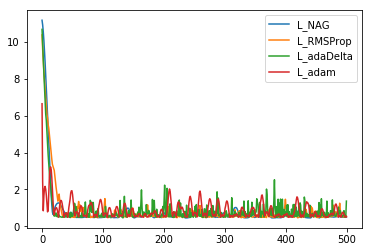

In [42]:
%matplotlib inline
plt.plot(train_loss_n, label="L_NAG")
plt.plot(train_loss_r, label ="L_RMSProp")
plt.plot(train_loss_aDe, label="L_adaDelta")
plt.plot(train_loss_ad, label="L_adam")
plt.legend(loc="upper right")